In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from eva_driver import driver

In [ ]:
result = driver

5
['car', 'person', 'person', 'car', 'fire hydrant', 'car']
['car', 'car', 'car', 'person', 'person', 'fire hydrant']
['car', 'car', 'person', 'person', 'fire hydrant']
['car', 'car', 'person', 'person', 'car']
['car', 'person', 'car', 'person', 'person', 'fire hydrant', 'bus']


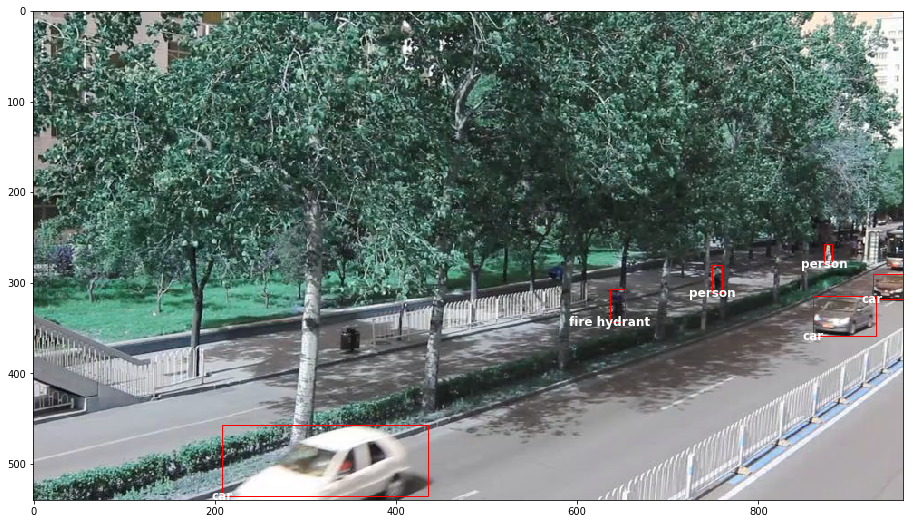

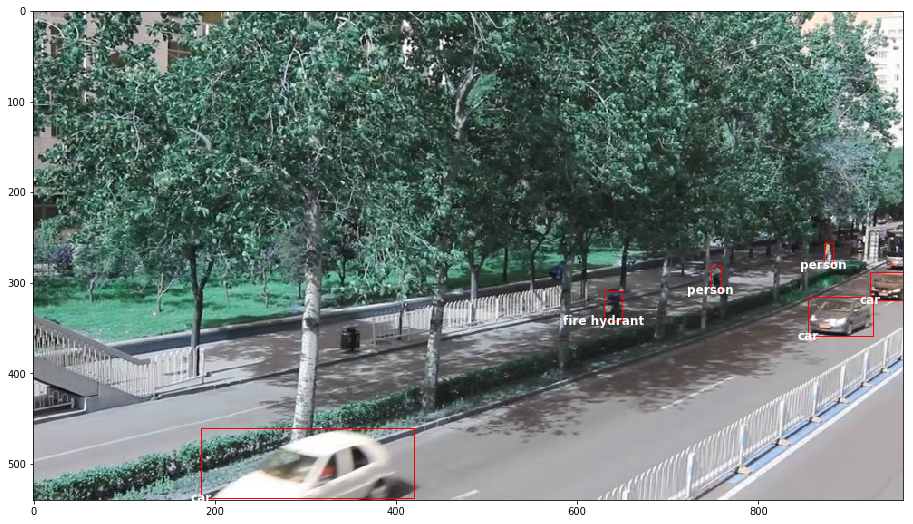

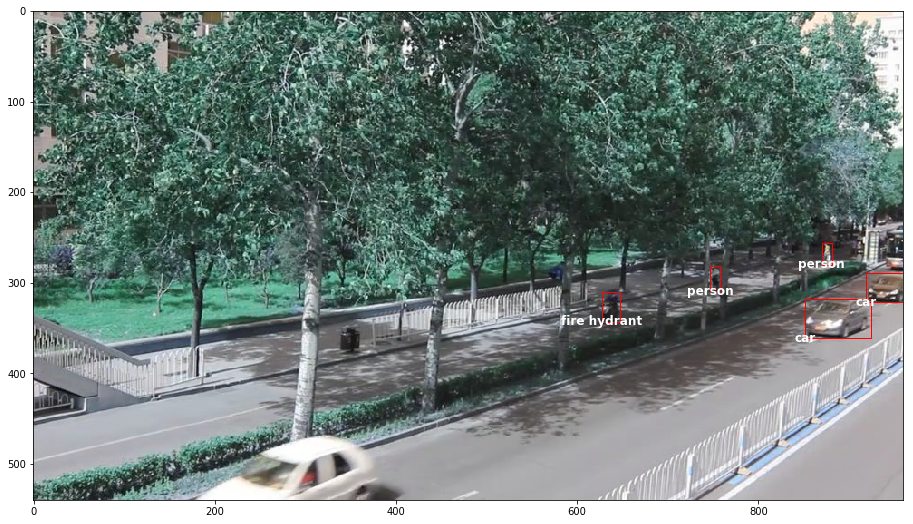

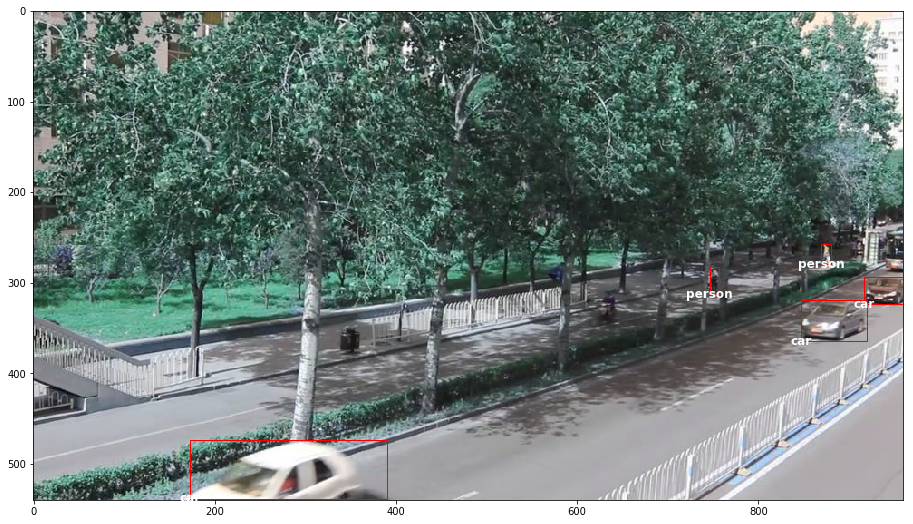

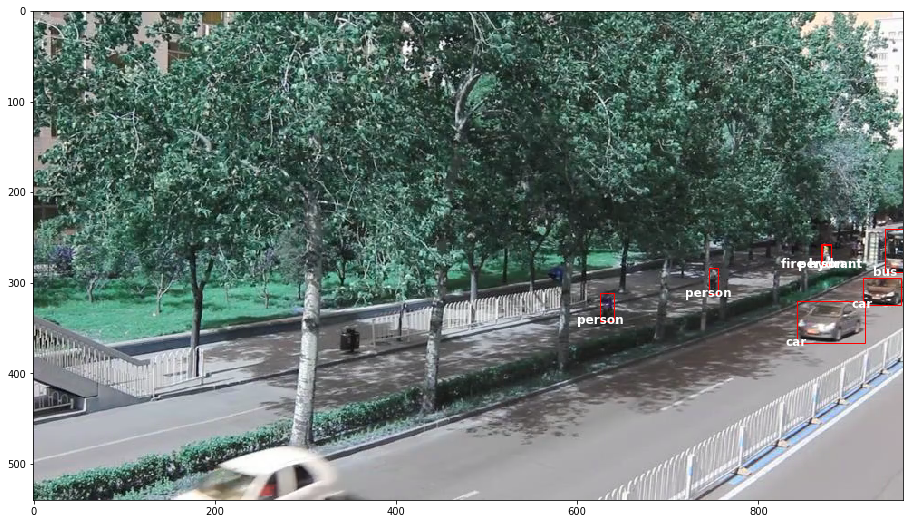

In [41]:
for batch in result:
    batch_predictions = batch.get_outcomes_for('fastrcnn')
    print(len(batch_predictions))
    for frame, prediction in zip(batch.frames, batch_predictions):
        print(prediction.labels)
        fig, axes = plt.subplots(figsize=(16,9)) #figure()
        #fig = plt.figure()
        #axes = fig.add_subplot()
        #fig.figsize((10,10))
        plt.imshow(frame.data)
        
        #for box in a frame
        for bounding_box, label  in zip(prediction.boxes, prediction.labels):
            bottom_left_x = bounding_box.top_left.x
            bottom_left_y = bounding_box.bottom_right.y
            
            upper_left_x = bounding_box.top_left.x
            upper_left_y = bounding_box.top_left.y
            width = abs(bounding_box.top_left.x - bounding_box.bottom_right.x)
            height = abs(bounding_box.top_left.y - bounding_box.bottom_right.y)
            
            rectangle = patches.Rectangle( (upper_left_x, upper_left_y),
                                          width,height,linewidth=1,edgecolor='r',facecolor='none' )
            axes.add_patch(rectangle) 
            
            axes.annotate(label, (bottom_left_x, bottom_left_y), color='w', weight='bold', 
                fontsize=12, ha='center', va='center')
        